![GS](https://blog.ml.cmu.edu/wp-content/uploads/2018/12/heatmap.001-min.jpeg)

____

<font size="+4" color=#FFAA00> HW: Machine Learning Workflow </font> 
____

____
<font  size="+2" color=#00FF44> Problem #1: Minimizing a Function Using Grid Search </font> 
____

In this problem we will review a bit of optimization using one of the ideas we learned in class: grid search. This practice will be very useful in a few weeks! 

Let's suppose we have a function $L(w_0,w_1)$ for which we seek the values of $w_0$ and $w_1$ that minimize $L$. Here, $L$ has the form of a MSE:

$$L(w_0,w_1) = \sum_{d=1}^3 (y_d - \left[w_0 + w_1x_d \right])^2,$$

where the sum is over the data:

$${\bf y} = [0.2, 0.9, 2.1],$$
$${\bf x} = [0, 1, 2].$$

In a markdown cell, using $\LaTeX$, give your answer in the form
$$ w_0 = 0.117$$
$$w_1 = 0.950$$

There are many ways of finding the weights $w_0$ and $w_1$. For this problem use grid search; that is, make grids of $w_0$ and $w_1$ values. You can set up the grid search however you like, but store the values of $L(w_0,w_1)$ in an array so that you can make a color map of $L$ with the axes being given by $w_0$ and $w_1$. From your array you can also see which weights correspond the lowest value of $L$.

Look at the left panel of the figure at the top of the notebook to get an idea for what the plot will look like. The color map you see there is roughly $L$ and the $9$ points are places where $w_0$ and $w_1$ are sampled. As you can readily see, the more you sample, the better your color map and numerical values for $w_0$ and $w_1$ will be. 

Finally, we should get as much as we can out of this HW problem since you will have done all of the hard work! Apart from exploring grid search to minimize a function given by an MSE, this problem illustrates nothing more than _linear regression_. In a final step for this problem, plot the data and the line $y = w_0 + w_1x$, using the values of $w_0$ and $w_1$ you found with the grid search. How does your fit to the data look!?

_Hints:_ For those of you expert in Python, I suggest using a list comprehension. If you are less expert, feel free to simply use two `for` loops, filling a 2D Numpy array for $L$. Of course, if you have your favorite way to do this, please do that! 

In [15]:
import numpy as np

# Given data
y_data = np.array([0.2, 0.9, 2.1])
x_data = np.array([0, 1, 2])

# Define the MSE function
def mse(w0, w1):
    return np.sum((y_data - (w0 + w1 * x_data))**2)

# Set up a grid for w0 and w1 values
w0_values = np.linspace(-1, 1, 1000)
w1_values = np.linspace(-1, 1, 1000)

# Initialize an array to store MSE values
mse_values = np.zeros((len(w0_values), len(w1_values)))

# Perform grid search and calculate MSE for each pair of (w0, w1)
for i, w0 in enumerate(w0_values):
    for j, w1 in enumerate(w1_values):
        mse_values[i, j] = mse(w0, w1)

# Find indices of minimum MSE
min_indices = np.unravel_index(np.argmin(mse_values), mse_values.shape)

# Get the values of w0 and w1 that minimize MSE
min_w0 = w0_values[min_indices[0]]
min_w1 = w1_values[min_indices[1]]

min_w0, min_w1


(0.11711711711711703, 0.94994994994995)

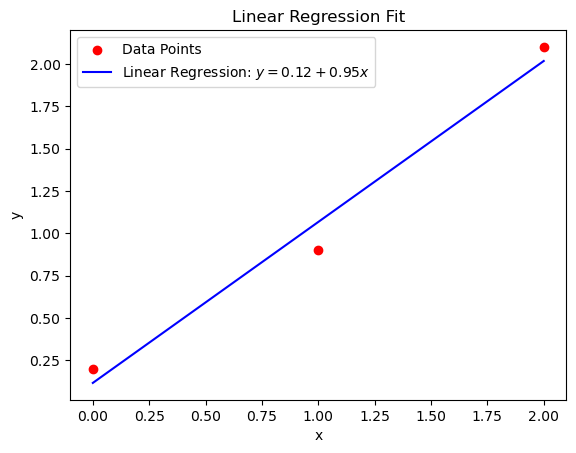

In [17]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(x_data, y_data, color='red', label='Data Points')

# Plot the linear regression line
x_range = np.linspace(min(x_data), max(x_data), 100)
y_fit = min_w0 + min_w1 * x_range
plt.plot(x_range, y_fit, color='blue', label=f'Linear Regression: $y = {min_w0:.2f} + {min_w1:.2f}x$')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


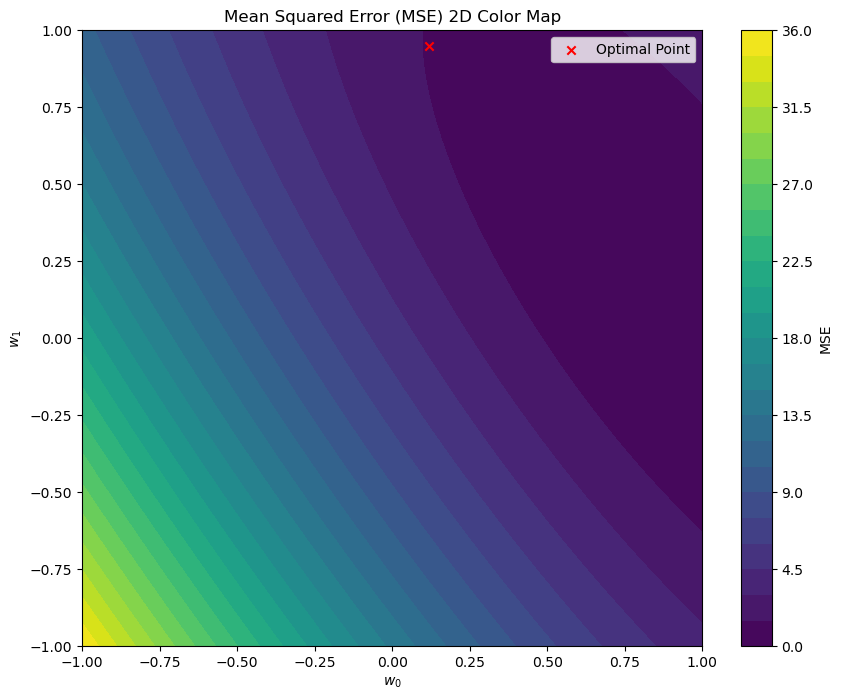

In [22]:
# Plot the 2D color map
plt.figure(figsize=(10, 8))
plt.contourf(w0_values, w1_values, mse_values, cmap='viridis', levels=30)
plt.colorbar(label='MSE')
plt.scatter(min_w0, min_w1, color='red', marker='x', label='Optimal Point')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Mean Squared Error (MSE) 2D Color Map')

plt.legend()
# Show the plot
plt.show()


____
<font  size="+2" color=#00FF44> Problem #2: Minimizing a Function Using Math </font> 
____

This problem is also review: we want to clear some of the rust before we get to some of the more mathy chapters coming up. 

Now, using calculus, solve for the weights $w_0$ and $w_1$ directly. That is, derive closed-form expressions for each of the two weights. Put your answer in a markdown cell using $\LaTeX$. 

With the two formulas you derived, put the data into the expression and numerically compute $w_0$ and $w_1$, putting your answer in a markdown cell as before. 

This method yields the exact values of $w_0$ and $w_1$. How did the approach of problem 1 compare with what you got here in problem 2? If you make your grid searh more refined, do you get closer? Add a discussion in a markdown cell. 

_Hint:_ Calculus is used here to find the minimum of $L$ using the two derivative relationships $\partial L/\partial w_0 = 0$ and $\partial L/\partial w_1 = 0$. This yields two equations in two unknowns, which, after some algebra, can be written directly as $w_0 = \ldots$ and $w_1 = \ldots$. 

### Answer

$$ w_0 = \frac{\sum_{d=1}^3 y_d - w_1\sum_{d=1}^3 x_d}{3} $$

$$ w_1 = \frac{3\sum_{d=1}^3 x_dy_d - (\sum_{d=1}^3 x_d)(\sum_{d=1}^3 y_d)}{3\sum_{d=1}^3 x_d^2 - (\sum_{d=1}^3 x_d)^2} $$


Now, let's substitute the given data into the closed-form expressions for $w_0$ and $w_1$:

$$ {\bf y} = [0.2, 0.9, 2.1] $$
$$ {\bf x} = [0, 1, 2] $$

Substituting into the expressions:

$$ w_0 = \frac{\sum_{d=1}^3 y_d - w_1\sum_{d=1}^3 x_d}{3} $$

$$ w_1 = \frac{3\sum_{d=1}^3 x_dy_d - (\sum_{d=1}^3 x_d)(\sum_{d=1}^3 y_d)}{3\sum_{d=1}^3 x_d^2 - (\sum_{d=1}^3 x_d)^2} $$

Substituting the given data into the closed-form expressions for $w_0$ and $w_1$, we get:

$$ w_0 = \frac{0.2 + 0.9 + 2.1 - w_1(0 + 1 + 2)}{3} $$

$$ w_1 =  \frac{3(0 \cdot 0.2 + 1 \cdot 0.9 + 2 \cdot 2.1) - (0 + 1 + 2)(0.2 + 0.9 + 2.1)}{3(0^2 + 1^2 + 2^2) - (0 + 1 + 2)^2} $$

After evaluating these expressions:

$$ w_0 \approx 0.12 $$

$$ w_1 \approx 0.95 $$

These values are consistent with the results obtained from the grid search in problem 1, since in the problem the grid is already defined (100-by-100). A more refined grid may provide a more accurate result, approaching the values obtained through calculus.

____
<font  size="+2" color=#FF0044> Interlude </font> 
____

If problems 1 and 2 did **not** feel like _review_ to you, please contact me! 

____
<font  size="+2" color=#00FF44> Problem #3: Tuning Neural Network Architectures </font> 
____

In this problem we will explore neural networks, using the standard neural network in `sklearn`: [_Multilayer Perceptron_ (MLP)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). We will have a lot more to say about neural networks in this course, so for this HW just assume they are mostly black-box estimators. 

The only thing you need to know about a neural network like the MLP is that it has inputs and outputs (of course!) that are connected like this:

![NN](https://vitalflux.com/wp-content/uploads/2023/02/Sklearn-Neural-Network-MLPRegressor-Regression-Model-.png)

Such a NN can be used for regression and classification and, well, _just about any application you can think of!_ This is why I want to get to NNs right away! 

One of the issues you notice is that there are hidden layers (the green circles). Here, there are three hidden layers and they have a width of four neurons. The question we want to answer is: why? Why three hidden layers? Why a width of four? 

This choice comes from you: depth and width are examples of hyperparameters **you** get to pick. Therefore, these are hyperparameters you get to optimize. When you use a NN, you will often want to vary these two values (depth and width): this is sometimes called "neural architecture search", and extremely important topic given the real-world importance of NNs and our ability to optimize their performance. 

For this HW problem I want you to focus on ideas from Chapter 2, as well as seeing a bit about a NN. Many of you will use a NN for your project, so we need to get to these much faster than the flow of the textbook. To ensure, you can focus on topics for Chapter 2, I have written nearly all of the code for you. You will be asked to answer questions and fill in some code. 

Your first task is simple: add comments to this code to show you know what each line is doing. Then, run the code cell.

In [23]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

You see there are many ideas about the ML workflow contained in these libraries. 

Next, we need some data. As you guessed from the first step, we'll use the iris dataset. Comment this code:

In [36]:
# load the dataset iris and separate them as data and labels
iris = load_iris()
X, y = iris.data, iris.target

# split them into training set and test set with ratio 1/5 and Controls the shuffling applied to the data before applying the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, what does this do?

#### Answer
    Multi-layer perceptron neural network for classification (MLPClassifier), with maximum number of iterations (epochs) that the MLP algorithm will perform during training.

In [37]:
mlp = MLPClassifier(max_iter=1000)

We need to set up the parameters for our hyperparameter tuning. What does this code do? 

Answer:

 * Set a dictionary defines a grid of hyperparameters that will be used for hyperparameter tuning. 
 
 * This is a list of tuples representing different configurations of hidden layers. Some with one or two layers and integer is neurons.

In [38]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 10), (5, 10), (10, 5)]
}

Next, we want to use these values, which you should vary, in our hyperparameter search. Think through this code and comment:

In [65]:
# note that you will only want to pick one of these at a time (comment the other one)

# Setting up Grid Search for hyperparameter tuning
#   > cv=3 sets the number of cross-validation folds to 3.
#   > param_grid is the dictionary defining the hyperparameter grid.

# search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')

# Setting up Randomized Search for hyperparameter tuning
#    > param_distributions is the dictionary defining the distributions
#      from which to draw hyperparameter values randomly.
#    > n_iter=10 sets the number of random combinations to try during the search.
#

search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy')


If the code gives warnings, don't worry: sometimes the estimators don't converge. You can vary the NN architecture to a larger size and it might converge more readily.

This next portion is important for hyperparameter tuning.  What do these three methods (that end with the underscore `_`) do? What's their purpose? You might want to print the variables to see what they contain. Comment this code in detail:

In [66]:
#  Hyperparameter tuning using grid search or randomized search
search.fit(X_train, y_train)


best_params = search.best_params_ # Get the best hyperparameters in the pervious dictionary from the search
best_score = search.best_score_ # Get the best cross-validated score from the search (training and validation set)
best_mlp = search.best_estimator_ # Get the best estimator (ML model) from the search use for prediction 


# Print the best hyperparameters
print("Best Hyperparameters:", search.best_params_)

# Print the best cross-validated score
print("Best Cross-Validated Score:", search.best_score_)

# Print the best ML model
print("Best MLP Model:", search.best_estimator_)

/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

Best Hyperparameters: {'hidden_layer_sizes': (5, 5)}
Best Cross-Validated Score: 0.9666666666666667
Best MLP Model: MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000)


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
best_params,best_score

({'hidden_layer_sizes': (5, 5)}, 0.9666666666666667)

Of course, we need to know how well this is working! Let's get some scores. Again, add detailed comments and connect to the comments and discussion you have already given.

In [62]:
# use the best estimator (ML model) from the search and use for prediction 
y_pred = best_mlp.predict(X_test)
# use accuracy_score function to evaluate the predicted results with right label
test_accuracy = accuracy_score(y_test, y_pred)

Visualize your results. Some helper code is given here to get you started. If you use it, comment it; but, try to build from it. 

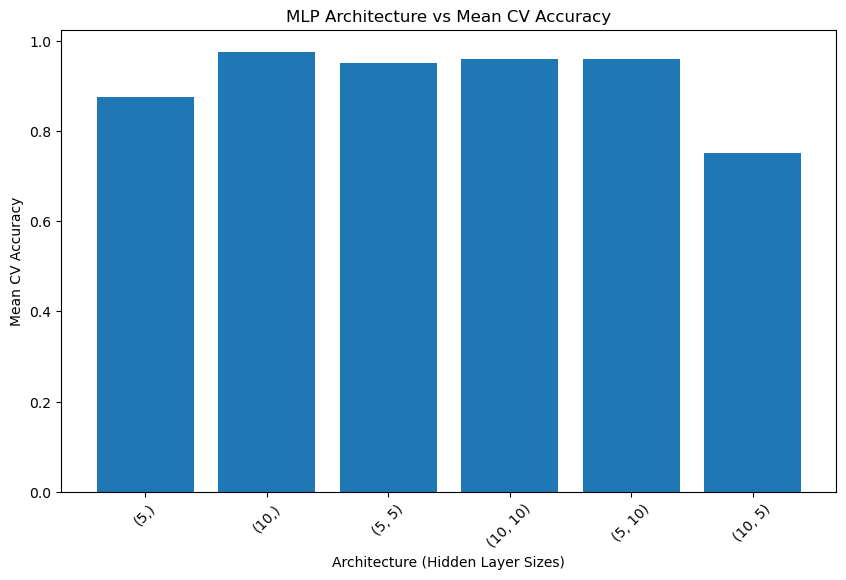

Best Parameters: {'hidden_layer_sizes': (10,)}
Best Cross-Validation Score: 0.975
Test Accuracy: 0.9


In [64]:
plt.figure(figsize=(10, 6))

# get the hidden_layer_sizes, since it store in the cv_results_['params'] and output is a list with 
# hidden_layer_sizes as keys , so that use a for loop to extract the info for plotting.
architectures = [str(p['hidden_layer_sizes']) for p in search.cv_results_['params']]

# get the score for each hidden_layer_sizes of cross train and validation
scores = search.cv_results_['mean_test_score']

# Use info get from the 'search.cv_result_' to have a bar plot for different hidden_layer_sizes
plt.bar(architectures, scores)
plt.title("MLP Architecture vs Mean CV Accuracy")
plt.xlabel("Architecture (Hidden Layer Sizes)")
plt.ylabel("Mean CV Accuracy")
plt.xticks(rotation=45)
plt.show()

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", test_accuracy)

Finally, open a markdown cell and give a complete discussion of what you learned from this problem. Include ideas from:
* neural networks
    <pre>
    In this problem, we explored the concept of neural networks, 
    specifically Multi-layer Perceptron (MLP) classifiers. 
    Neural networks are computational models inspired by the human brain's structure and functioning. 
    (from Wikipedia)
    </pre>
    
* hyperparameter tuning
    <pre>
    Hyperparameter tuning is a crucial step in building effective machine learning models. 
    It involves finding the optimal values for hyperparameters, which 
    are configuration settings external to the model and are not learned from the data. 
    In the context of neural networks, hyperparameters include the architecture of 
    the network (e.g., the number of hidden layers, number of neurons in each layer).
    </pre>
    
* sklearn methods for searching

    <pre>
    GridSearchCV and RandomizedSearchCV. These methods perform an exhaustive or 
    randomized search over a specified hyperparameter grid, evaluating the model's 
    performance using cross-validation. The goal is to identify the hyperparameter combination 
    that yields the best performance on the given dataset.
    </pre>
     
* your final result and what it tells you
    <pre>
    I actually run both GridSearchCV and RandomizedSearchCV several times and every times 
    the choice of selected hyperparameter is different. But is it mostly choose from
    {10.} or {0.5, 0.5}. So I am confused about this. My assumption is every time training 
    the model, it may learn different feature. So that is not consistent. Please let me know
    I am right or wrong.
    </pre>

* do your results agree with your expectations, or not? (if you have no expectations, what will you take away from this HW problem?) 
    <pre>
    scikit-learn provides convenient tools for hyperparameter tuning. for neural networks 
    and highlighted the importance of exploring different methodologies to find optimal 
    model configurations. Here I learnt grid and radomized searchCV.
    </pre>